# Exploratory Data Analysis (EDA)

## Step 1: Load and Inspect the Data


In [28]:
# 1.1 load the dataset
import pandas as pd

#load the dataset
df = pd.read_csv("D:/Credit_Card_Spend_Analysis/data/merged_credit_data.csv")

#displat the basic info
df.info()

#show the first rows
df.head()

C:\Users\Subhan\AppData\Local\Temp\ipykernel_8552\2951173037.py:5: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:/Credit_Card_Spend_Analysis/data/merged_credit_data.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006229 entries, 0 to 1006228
Data columns (total 45 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   trans_date_trans_time    1006229 non-null  object 
 1   cc_num                   1006229 non-null  int64  
 2   merchant                 1006229 non-null  object 
 3   category                 1006229 non-null  object 
 4   amt                      1006229 non-null  float64
 5   first                    1006229 non-null  object 
 6   last                     1006229 non-null  object 
 7   gender                   1006229 non-null  object 
 8   street                   1006229 non-null  object 
 9   city                     1006229 non-null  object 
 10  state                    1006229 non-null  object 
 11  zip                      1006229 non-null  int64  
 12  lat                      1006229 non-null  float64
 13  long                     1006229 non-null 

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud,transaction_description
0,2020-05-07 04:17:21,4425161475596168,Block-Parisian,misc_net,46.23,Brooke,Fisher,F,815 Heather Divide Apt. 965,San Angelo,...,2,4,4,United Kingdom,4,1,56.7,7,0,entertainment pos visa
1,2020-05-07 04:17:21,4425161475596168,Block-Parisian,misc_net,46.23,Brooke,Fisher,F,815 Heather Divide Apt. 965,San Angelo,...,2,3,4,United Kingdom,4,0,41.6,7,0,services pos mastercard
2,2020-05-07 04:17:21,4425161475596168,Block-Parisian,misc_net,46.23,Brooke,Fisher,F,815 Heather Divide Apt. 965,San Angelo,...,2,5,4,United Kingdom,4,1,38.9,2,0,restaurant pos visa
3,2020-05-07 04:17:43,4904681492230012,"Osinski, Ledner and Leuschke",grocery_pos,100.41,Lisa,Lowe,F,574 David Locks Suite 207,Cottekill,...,1,2,4,United Kingdom,4,0,39.9,1,0,entertainment pos visa
4,2020-05-07 04:17:43,4904681492230012,"Osinski, Ledner and Leuschke",grocery_pos,100.41,Lisa,Lowe,F,574 David Locks Suite 207,Cottekill,...,1,4,4,United Kingdom,4,0,30.6,2,0,electronics online visa


In [2]:
# 1.2 Check for missing values $ Duplcates

#check for missing values
print(df.isnull().sum())

# check for duplicates
print(df.duplicated().sum())

# Drop duplicates if necessary
df = df.drop_duplicates()


trans_date_trans_time     0
cc_num                    0
merchant                  0
category                  0
amt                       0
first                     0
last                      0
gender                    0
street                    0
city                      0
state                     0
zip                       0
lat                       0
long                      0
city_pop                  0
job                       0
dob                       0
trans_num                 0
unix_time                 0
merch_lat                 0
merch_long                0
is_fraud                  0
merch_zipcode             0
Date_x                    0
Time_x                    0
company_parts             0
merchant_fraud_rate       0
month                     0
Transaction ID            0
Date_y                    0
Day of Week               0
Time_y                    0
Type of Card              0
Entry Mode                0
Amount                    0
Type of Transaction 

In [3]:
# 1.3 Basic Statistics & overview

# Summary statistics for the dataset
print(df.describe())

#unique categories in categorical col
print(df.nunique())


             cc_num           amt           zip           lat          long  \
count  1.006229e+06  1.006229e+06  1.006229e+06  1.006229e+06  1.006229e+06   
mean   4.103351e+17  7.052527e+01  4.701234e+04  3.849124e+01 -8.888798e+01   
std    1.298402e+18  1.746389e+02  2.585742e+04  4.621687e+00  1.222145e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.554880e+02   
25%    1.800365e+14  9.580000e+00  2.521300e+04  3.484700e+01 -9.538000e+01   
50%    3.521815e+15  4.753000e+01  4.614300e+04  3.920480e+01 -8.655980e+01   
75%    4.629452e+15  8.310000e+01  6.893200e+04  4.158550e+01 -7.999060e+01   
max    4.992346e+18  2.711977e+04  9.932300e+04  4.888780e+01 -6.795030e+01   

           city_pop     unix_time     merch_lat    merch_long      is_fraud  \
count  1.006229e+06  1.006229e+06  1.006229e+06  1.006229e+06  1.006229e+06   
mean   8.506416e+04  1.369948e+09  3.849499e+01 -8.889401e+01  6.530323e-03   
std    2.977169e+05  1.096609e+06  4.625991e+00  1.

## Step 2: Basic EDA (Beginner-Level)

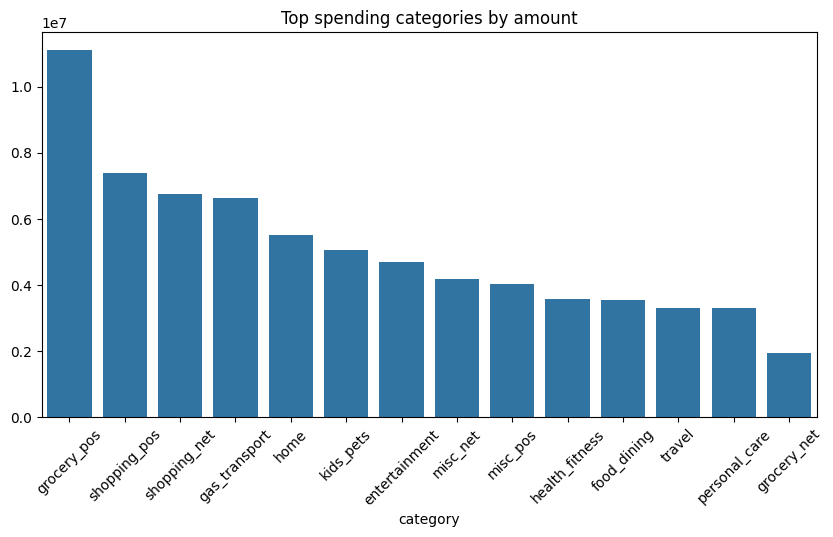

In [4]:
# 2.1 Top Spending Categories by Transaction Volume & Amount
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate spending by category
category_spending = df.groupby("category")['amt'].sum().sort_values(ascending=False)
category_transaction = df['category'].value_counts()

#plot the top categories by amount spent
plt.figure(figsize=(10, 5))
sns.barplot(x=category_spending.index, y=category_spending.values)
plt.xticks(rotation=45)
plt.title("Top spending categories by amount")
plt.show()

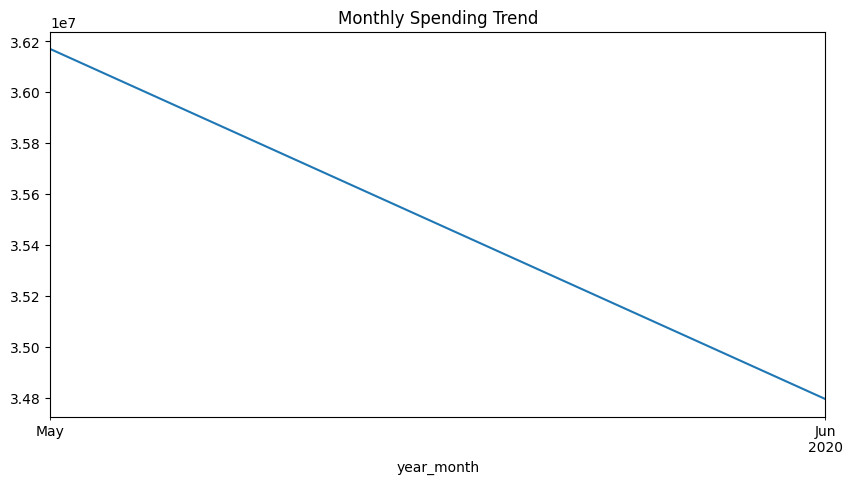

In [5]:
# 2.2 Spending Trends Over Time (Daily, Weekly, Month

#convert date column to datetime
df['date'] = pd.to_datetime(df['trans_date_trans_time'])

# Extact time-based features
df['year_month'] = df["date"].dt.to_period("M")
df['day_of_week'] = df["date"].dt.day_name()

# plot monthly trends
df.groupby("year_month")["amt"].sum().plot(kind="line", figsize=(10, 5), title="Monthly Spending Trend")
plt.show()

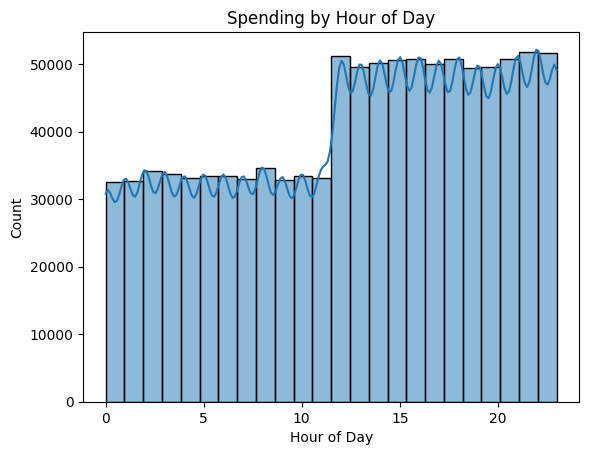

In [6]:
# 2.3 Peak Spending Hours in a Day
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour'] = df['trans_date_trans_time'].dt.hour

# plot spending the hour
sns.histplot(df['hour'], bins=24, kde=True)
plt.title("Spending by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.show()

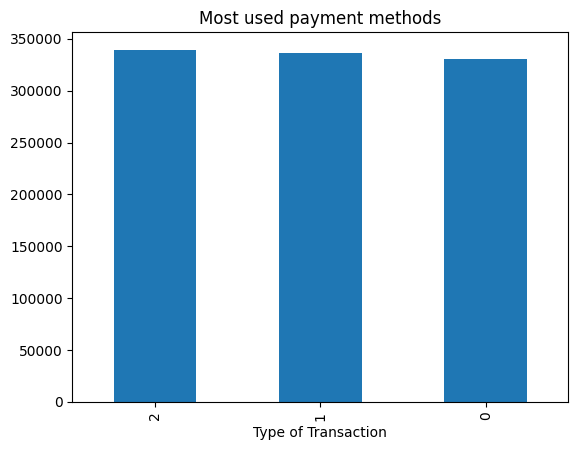

In [7]:
# 2.4 Most Common Payment Method

df['Type of Transaction'].value_counts().plot(kind='bar', title="Most used payment methods")
plt.show()

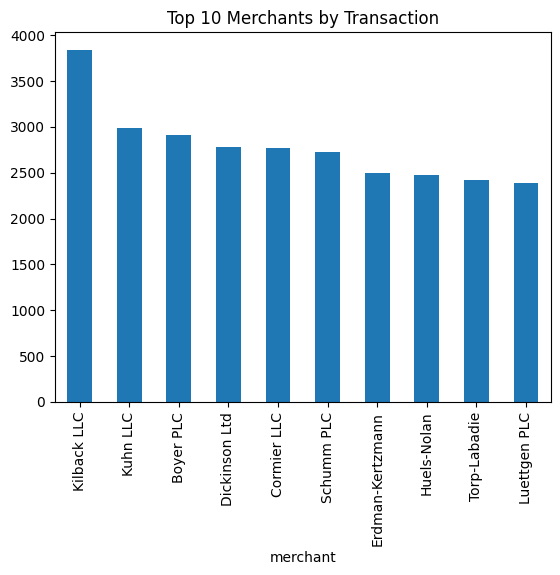

In [8]:
# 2.5 Top Merchants by Transactions
df['merchant'].value_counts().head(10).plot(kind='bar', title="Top 10 Merchants by Transaction")
plt.show()

## Step 3: Intermediate EDA

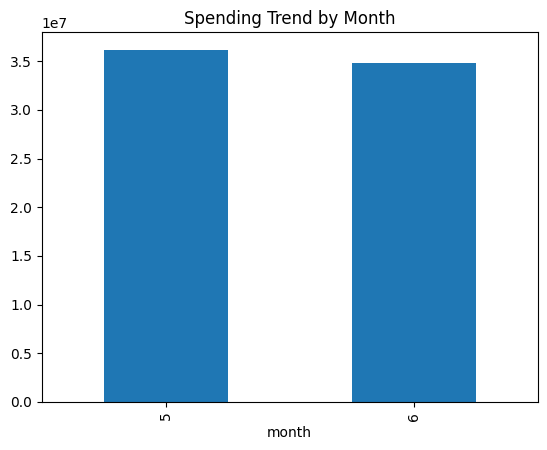

In [9]:
# 3.1 Seasonal Trends in Spending

df['month'] = df['trans_date_trans_time'].dt.month
df.groupby('month')['amt'].sum().plot(kind='bar', title="Spending Trend by Month")
plt.show()

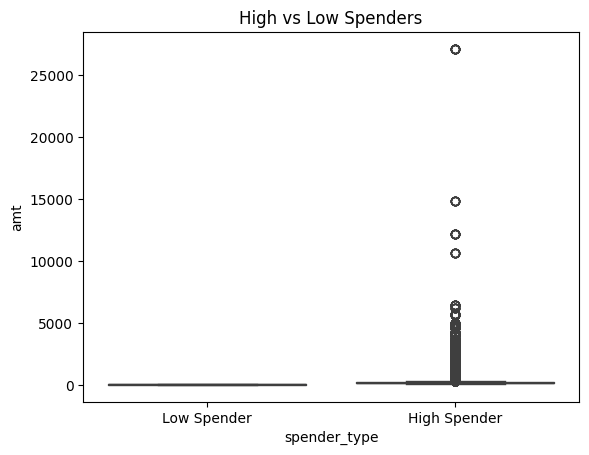

In [10]:
# 3.2 Customer Segmentation (High Spenders vs. Low Spenders)

# Define high spenders (e.g., customers in the top 20% spending percentile)
threshold = df["amt"].quantile(0.8)
df["spender_type"] = df["amt"].apply(lambda x: "High Spender" if x >= threshold else "Low Spender")

sns.boxplot(x="spender_type", y="amt", data=df)
plt.title("High vs Low Spenders")
plt.show()


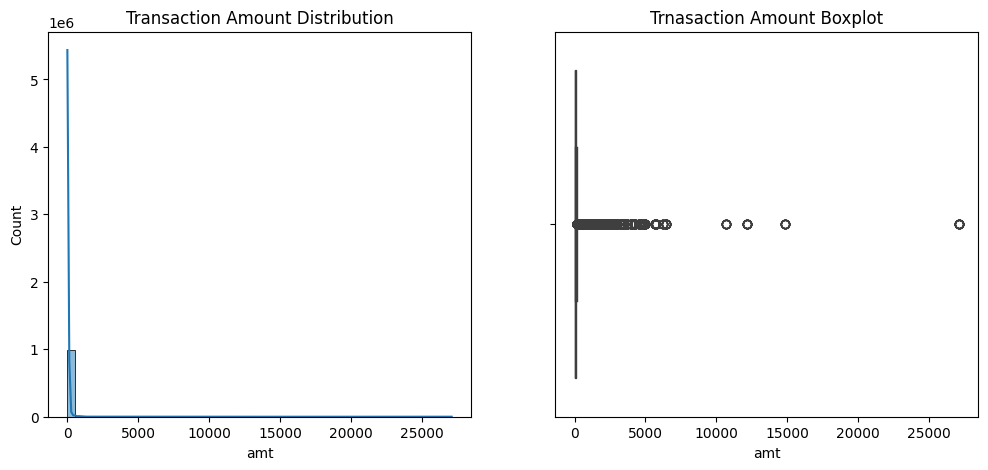

In [11]:
# 3.3 Distribution of Transaction Amounts (Histogram & Boxplot)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['amt'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")

plt.subplot(1, 2 , 2)
sns.boxplot(x=df['amt'])
plt.title("Trnasaction Amount Boxplot")

plt.show()

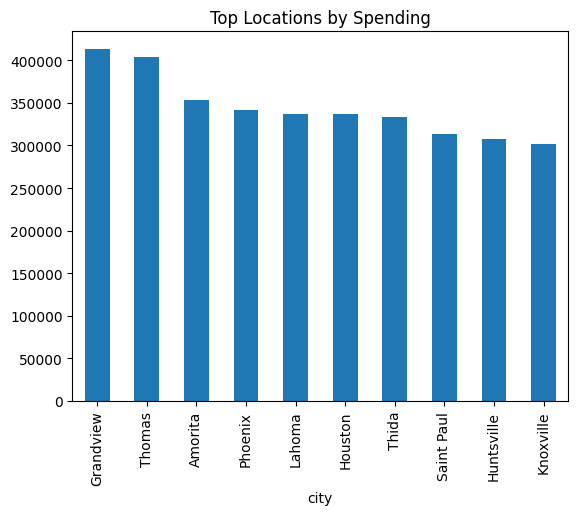

In [12]:
# 3.4 Correlation Between Spending & Location

df.groupby('city')['amt'].sum().sort_values(ascending=False).head(10).plot(kind='bar', title="Top Locations by Spending")
plt.show()

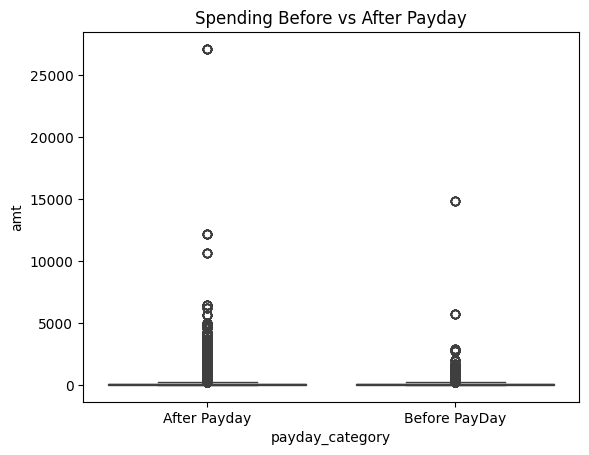

In [13]:
# 3.5 Spending Before & After Payday
# Assuming payday is the 1st of each month:

df['day_of_month'] = df['trans_date_trans_time'].dt.day
df['payday_category'] = df['day_of_month'].apply(lambda x: "Before PayDay" if x< 5 else "After Payday" )

sns.boxplot(x='payday_category', y='amt', data=df)
plt.title("Spending Before vs After Payday")
plt.show()

# Step 4: Advanced EDA

In [14]:
# 4.1 Outlier Detection in Spending (Using IQR)

Q1 = df['amt'].quantile(0.5)
Q3 = df['amt'].quantile(0.75)
IQR = Q3 -Q1

outliers = df[(df['amt'] < (Q1 - 1.5 * IQR)) | (df['amt'] > (Q3 + 1.5 * IQR))]
print("Number of Outliers : ", len(outliers))

Number of Outliers :  100597


c:\Users\Subhan\AppData\Local\anaconda3\envs\ml-env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


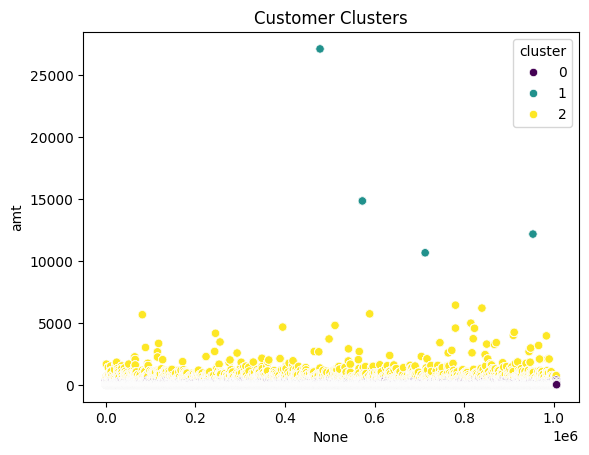

In [15]:
# 4.2 Customer Clustering (K-Means)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#selecting relevant features
X = df[['amt']]

# Standardize  the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply the K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

#plot the cluster
sns.scatterplot(x=df.index, y=df['amt'], hue=df['cluster'], palette="viridis")
plt.title("Customer Clusters")
plt.show()


In [16]:
# 4.3 Association Rule Mining (Apriori)
# Association rule mining is a technique used to discover interesting patterns or relationships between items in a large database.
# It is used to identify the rules that govern the relationships between items in a database.
# Association rule mining is a type of unsupervised learning that is used to identify patterns in data
# without the need for labeled data.

from mlxtend.frequent_patterns import apriori, association_rules

#covert transaction to basket format
basket = df.groupby(['Country of Transaction',  "category"])['amt'].sum().unstack().fillna(0)
basket = basket.applymap(lambda x : 1 if x > 0 else 0)

#apply the algorithm
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

print(rules.head())

C:\Users\Subhan\AppData\Local\Temp\ipykernel_8552\376841098.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x : 1 if x > 0 else 0)
c:\Users\Subhan\AppData\Local\anaconda3\envs\ml-env\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
c:\Users\Subhan\AppData\Local\anaconda3\envs\ml-env\lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


       antecedents      consequents  antecedent support  consequent support  \
0  (entertainment)    (food_dining)                 1.0                 1.0   
1    (food_dining)  (entertainment)                 1.0                 1.0   
2  (entertainment)  (gas_transport)                 1.0                 1.0   
3  (gas_transport)  (entertainment)                 1.0                 1.0   
4    (grocery_net)  (entertainment)                 1.0                 1.0   

   support  confidence  lift  representativity  leverage  conviction  \
0      1.0         1.0   1.0               1.0       0.0         inf   
1      1.0         1.0   1.0               1.0       0.0         inf   
2      1.0         1.0   1.0               1.0       0.0         inf   
3      1.0         1.0   1.0               1.0       0.0         inf   
4      1.0         1.0   1.0               1.0       0.0         inf   

   zhangs_metric  jaccard  certainty  kulczynski  
0            0.0      1.0        0.0     

# Extra --Feature Engineering New Economic Indicators

In [17]:
# Normalize city_pop (Log Transformation)
import numpy as np

# apply log transformation to city_pop
df['log_city_pop'] = np.log1p(df['city_pop'])

In [18]:
# Categorize merchant_fraud_rate
df['fraud_risk'] = pd.cut(df['merchant_fraud_rate'], bins=[0, 0.01, 0.05, 0.1, 1],
                          labels=['Low', 'Medium', 'High', 'Very High'])


In [19]:
# Categorize Spending Power Based on Transaction Amount
df["spending_power"] = pd.qcut(df["amt"], q=4, labels=["Low", "Medium", "High", "Very High"])


In [20]:
# Adjust Spending Power Based on City Population
df["adjusted_spending_power"] = df["amt"] / (df["log_city_pop"] + 1)

In [21]:
# Incorporate Type of Card as a Proxy for Income
df["card_tier"] = df["Type of Card"].apply(lambda x: "Premium" if x in ["Platinum", "Gold"] else "Standard")


In [22]:
# Adjust Spending Power Based on Merchant Category
# Luxury merchants indicate higher financial flexibility
# Essential purchases suggest necessity-based spendin
luxury_merchants = ["Luxury Goods", "High-End Retail", "Fine Dining"]
essential_merchants = ["Grocery", "Gas", "Utilities"]

df["merchant_type"] = df["Merchant Group"].apply(lambda x: "Luxury" if x in luxury_merchants else "Essential" if x in essential_merchants else "Other")


In [23]:
# Compute Final Spending Power Score
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df["Amount"] = pd.to_numeric(df["Amount"], errors="coerce")
df["city_pop"] = pd.to_numeric(df["city_pop"], errors="coerce")

df["spending_power_score"] = (df["Amount"] / (df["log_city_pop"] + 1)) * \
                             (df["merchant_type"].apply(lambda x: 1.5 if x == "Luxury" else 1)) * \
                             (df["card_tier"].apply(lambda x: 1.2 if x == "Premium" else 1))

# Normalize between 0 and 1
df["spending_power_score"] = scaler.fit_transform(df[["spending_power_score"]])


c:\Users\Subhan\AppData\Local\anaconda3\envs\ml-env\lib\site-packages\sklearn\utils\_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
c:\Users\Subhan\AppData\Local\anaconda3\envs\ml-env\lib\site-packages\sklearn\utils\_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [24]:
df['is_fraud']

0          0
1          0
2          0
3          0
4          0
          ..
1006224    0
1006225    0
1006226    0
1006227    0
1006228    0
Name: is_fraud, Length: 1006229, dtype: int64

In [25]:
# 4.4 Spending Behavior vs Economic Factors
# Spending behavior is influenced by a variety of economic factors. 
correlation = df[['amt', 'is_fraud', "city_pop"]].corr()
print(correlation)

               amt  is_fraud  city_pop
amt       1.000000  0.218665   0.00143
is_fraud  0.218665  1.000000  -0.01521
city_pop  0.001430 -0.015210   1.00000


In [31]:
df['transaction_description']

0             entertainment pos visa
1            services pos mastercard
2                restaurant pos visa
3             entertainment pos visa
4            electronics online visa
                    ...             
99995     electronics pos mastercard
99996        children atm mastercard
99997    subscription atm mastercard
99998              products pos visa
99999            restaurant pos visa
Name: transaction_description, Length: 100000, dtype: object

In [30]:
if df["transaction_description"].isnull().sum() > 0:
    # Drop rows where transaction_description is null
    df = df.dropna(subset=["transaction_description"])
    print(f"Dropped {df['transaction_description'].isnull().sum()} rows with null values.")
else:
    print("No null values found in transaction_description.")


Dropped 0 rows with null values.


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Step 1: Data Preprocessing
df["transaction_description"] = df["transaction_description"].str.lower()
df.dropna(subset=["transaction_description"], inplace=True)  # Drop missing descriptions

# Step 2: Text Vectorization (TF-IDF)
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_text = vectorizer.fit_transform(df["transaction_description"])

# Step 3: Feature Engineering (Combine TF-IDF with numerical features)
X_numerical = df[["amt", "Gender", "Age"]].values
X = hstack([X_text, X_numerical])  # Efficient sparse matrix stacking

# Step 4: Prepare Labels and Split Data
y = df["category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 5: Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42, k_neighbors=min(3, min(y_train.value_counts()) - 1))
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Step 6: Train Random Forest Model with Hyperparameter Tuning
rf_model = RandomForestClassifier(class_weight="balanced", random_state=42, n_jobs=-1)

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5],
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_resampled, y_resampled)

# Step 7: Evaluate the Model
y_pred = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))
